# 导师制名企实训班商业智能方向 004期 Lesson 7

### Thinking 1： 参数共享指的是什么？

CNN中的某一卷积核在整张图片上对于不同位置做卷积操作的时候，其卷积核的参数会被整张图共享（在当前卷积操作时参数不会变化），这就是CNN中参数共享的意思。

### Thinking 2：为什么会用到batch normalization ?

由于神经网络的参数更新，所以某一层的输入（前一层的输出）的分布会发生变化，这会导致反向传播时低层神经网络的梯度消失，导致深层神经网络收敛越来越慢。所以，Batch Normalization操作，对于每个隐层神经元，把输入分布强制拉回到均值为0方差为1的比较标准的正态分布，使得非线性变换函数的输入值落入对输入比较敏感的区域，以此避免梯度消失问题。

### Thinking 3： 使用dropout可以解决什么问题？

深度神经网络具有很强的拟合能力，这也导致模型容易出现过拟合现象，Dropout就可以一定程度上缓解模型过拟合问题。在每个批次中，Dropout通过随机忽略一定概率（通常是一半）的神经节点，减少神经节点之间的相互依赖作用，使得模型泛化能力更强。

### Action 1： 使用任何神经网络框架，对CIFAR-10进行分类
http://www.cs.toronto.edu/~kriz/cifar.html  
训练集 50000，测试集 10000  
图像大小 32*32 彩色  
10个分类：ariplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck  

### 使用ResNet

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [2]:
# 数据加载
train_data = datasets.CIFAR10(root='data/cifar10/', train=True, transform=transforms.ToTensor(), download=True)
test_data = datasets.CIFAR10(root='data/cifar10/', train=False, transform=transforms.ToTensor(), download=True)


Files already downloaded and verified
Files already downloaded and verified


(3, 32, 32)
(32, 32, 3)


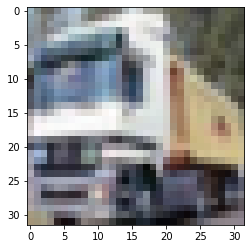

In [3]:
import matplotlib.pyplot as plt
# 输出图像
temp = train_data[1][0].numpy()
print(temp.shape)
temp = temp.transpose(1,2,0)
print(temp.shape)
plt.imshow(temp)
plt.show()

In [4]:
# 超参数定义
EPOCH = 20
BATCH_SIZE = 512
LR = 0.0005

# 使用DataLoader进行分批
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

# 使用ResNet
model = torchvision.models.resnet34(pretrained=True)

In [5]:
# 定义损失函数
criterion = nn.CrossEntropyLoss()
# 定义优化器
optimizer = optim.Adam(model.parameters(), lr=LR)
# 定义device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
print('device:',device)

device: cuda:0


In [6]:
import time 
model.train()
# 训练
for epoch in range(EPOCH):
    start_time = time.time()
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
        outputs = model(inputs)
        # 计算损失函数
        loss = criterion(outputs, labels)
        # 清空上一轮梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
    print('epoch:{:2} loss:{:.4f} time:{:.4f}'.format(epoch+1, loss.item(), time.time()-start_time))

epoch: 1 loss:0.6644 time:24.9233
epoch: 2 loss:0.5800 time:24.7075
epoch: 3 loss:0.3569 time:24.8903
epoch: 4 loss:0.2686 time:24.9301
epoch: 5 loss:0.1761 time:24.9450
epoch: 6 loss:0.1299 time:24.9413
epoch: 7 loss:0.1829 time:24.9018
epoch: 8 loss:0.0961 time:24.9080
epoch: 9 loss:0.0669 time:24.7413
epoch:10 loss:0.0444 time:24.7536
epoch:11 loss:0.0418 time:24.7128
epoch:12 loss:0.0601 time:24.7071
epoch:13 loss:0.0455 time:24.7459
epoch:14 loss:0.0505 time:24.7184
epoch:15 loss:0.0283 time:24.7418
epoch:16 loss:0.0324 time:24.7743
epoch:17 loss:0.0540 time:24.7535
epoch:18 loss:0.0367 time:24.8363
epoch:19 loss:0.0404 time:24.9979
epoch:20 loss:0.0416 time:24.9573


In [7]:
# 保存训练模型
file_name = 'data/cifar10_resnet34.pt'
torch.save(model, file_name)
print(file_name+' saved')

data/cifar10_resnet34.pt saved


In [8]:
# 测试
model=torch.load(file_name)
model.eval()

correct, total = 0, 0
for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    # 预测结果
    _, predicted = torch.max(out.data, 1)
    # 判断预测结果与实际结果是否一致
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

# 输出识别准确率
print("10000张测试图像 准确率：{:.2f}%".format(100.0*correct/total))

10000张测试图像 准确率：82.19%


### 使用DenseNet

In [9]:
# 超参数定义
EPOCH = 20
BATCH_SIZE = 512
LR = 0.0005
# 使用DenseNet
model = torchvision.models.densenet121(pretrained=True)
# 定义损失函数
criterion = nn.CrossEntropyLoss()
# 定义优化器
optimizer = optim.Adam(model.parameters(), lr=LR)
# 定义device
model.to(device)
print('device:',device)

device: cuda:0


In [10]:
# 训练
model.train()
for epoch in range(EPOCH):
    start_time = time.time()
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
        outputs = model(inputs)
        # 计算损失函数
        loss = criterion(outputs, labels)
        # 清空上一轮梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
    print('epoch:{:2} loss:{:.4f} time:{:.4f}'.format(epoch+1, loss.item(), time.time()-start_time))

epoch: 1 loss:0.6621 time:33.5144
epoch: 2 loss:0.5438 time:33.3484
epoch: 3 loss:0.2628 time:33.3855
epoch: 4 loss:0.2396 time:34.1364
epoch: 5 loss:0.1082 time:33.9304
epoch: 6 loss:0.1166 time:33.8739
epoch: 7 loss:0.0813 time:33.9279
epoch: 8 loss:0.0651 time:33.9213
epoch: 9 loss:0.0699 time:33.8489
epoch:10 loss:0.0622 time:33.9397
epoch:11 loss:0.0657 time:34.2322
epoch:12 loss:0.0403 time:33.8383
epoch:13 loss:0.0482 time:33.4341
epoch:14 loss:0.0297 time:33.3062
epoch:15 loss:0.0448 time:33.3903
epoch:16 loss:0.0671 time:33.5370
epoch:17 loss:0.0655 time:33.7663
epoch:18 loss:0.0461 time:33.8703
epoch:19 loss:0.0357 time:34.0421
epoch:20 loss:0.0372 time:33.4931


In [11]:
# 保存训练模型
file_name2 = 'data/cifar10_densenet121.pt'
torch.save(model, file_name2)
print(file_name2+' saved')

data/cifar10_densenet121.pt saved


In [12]:
# 测试
model=torch.load(file_name2)
model.eval()

correct, total = 0, 0
for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    # 预测结果
    _, predicted = torch.max(out.data, 1)
    # 判断预测结果与实际结果是否一致
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

# 输出识别准确率
print("10000张测试图像 准确率：{:.2f}%".format(100.0*correct/total))

10000张测试图像 准确率：83.52%


### 使用VGG16

In [13]:
# 超参数定义
EPOCH = 20
BATCH_SIZE = 512
LR = 0.0005
# 使用DenseNet
model = torchvision.models.vgg16_bn(pretrained=True)
# 定义损失函数
criterion = nn.CrossEntropyLoss()
# 定义优化器
optimizer = optim.Adam(model.parameters(), lr=LR)
# 定义device
model.to(device)
print('device:',device)

device: cuda:0


In [14]:
# 训练
model.train()
for epoch in range(EPOCH):
    start_time = time.time()
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
        outputs = model(inputs)
        # 计算损失函数
        loss = criterion(outputs, labels)
        # 清空上一轮梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
    print('epoch:{:2} loss:{:.4f} time:{:.4f}'.format(epoch+1, loss.item(), time.time()-start_time))

epoch: 1 loss:0.4841 time:29.5992
epoch: 2 loss:0.2674 time:29.6310
epoch: 3 loss:0.1411 time:29.6751
epoch: 4 loss:0.1979 time:29.6764
epoch: 5 loss:0.1197 time:29.6793
epoch: 6 loss:0.0623 time:29.6746
epoch: 7 loss:0.0543 time:29.6754
epoch: 8 loss:0.0661 time:29.6683
epoch: 9 loss:0.0881 time:29.6646
epoch:10 loss:0.0880 time:29.6771
epoch:11 loss:0.0355 time:29.6974
epoch:12 loss:0.0489 time:29.6862
epoch:13 loss:0.0428 time:29.6830
epoch:14 loss:0.0112 time:29.6648
epoch:15 loss:0.0519 time:29.7088
epoch:16 loss:0.0892 time:29.6524
epoch:17 loss:0.0155 time:29.6584
epoch:18 loss:0.0638 time:29.6804
epoch:19 loss:0.0670 time:29.6850
epoch:20 loss:0.0179 time:29.6758


In [15]:
# 保存训练模型
file_name3 = 'data/cifar10_vgg16_bn.pt'
torch.save(model, file_name3)
print(file_name3+' saved')

data/cifar10_vgg16_bn.pt saved


In [16]:
# 测试
model=torch.load(file_name3)
model.eval()

correct, total = 0, 0
for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    # 预测结果
    _, predicted = torch.max(out.data, 1)
    # 判断预测结果与实际结果是否一致
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

# 输出识别准确率
print("10000张测试图像 准确率：{:.2f}%".format(100.0*correct/total))

10000张测试图像 准确率：87.85%
